In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

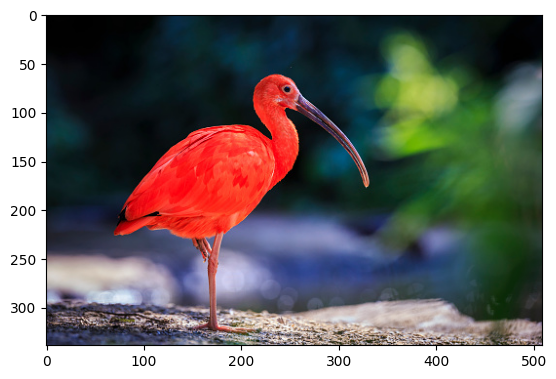

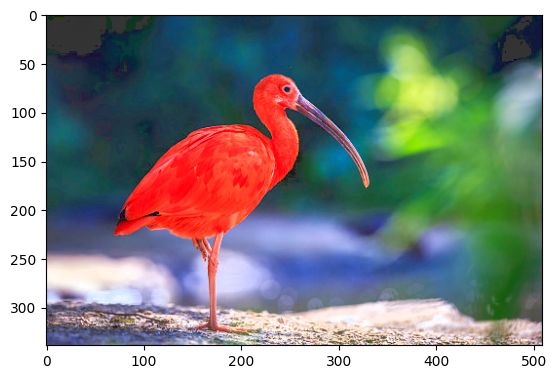

In [2]:
# Task 1

imBGR = cv2.imread('./../img/bird2.jpg') # BGR
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB) # BGR
imHSV = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV) # Conversion to HSV

h, s, v = cv2.split(imHSV)

brightness_increase = 50
v = v.astype(np.uint16)
v = np.clip(v + brightness_increase, 0, 255)
v = v.astype(np.uint8)
            
imBrightenedHSV = cv2.merge((h, s, v))
imBrightenedRGB = cv2.cvtColor(imBrightenedHSV, cv2.COLOR_HSV2RGB)

plt.imshow(imRGB)
plt.show()

plt.imshow(imBrightenedRGB)
plt.show()

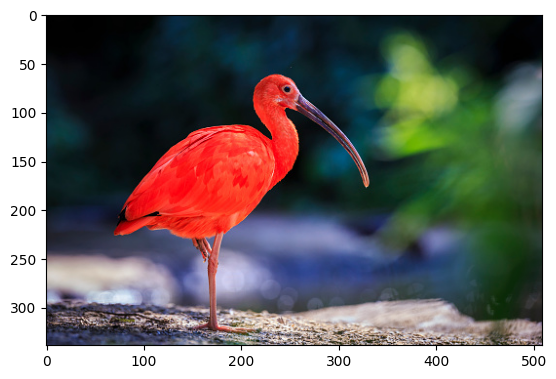

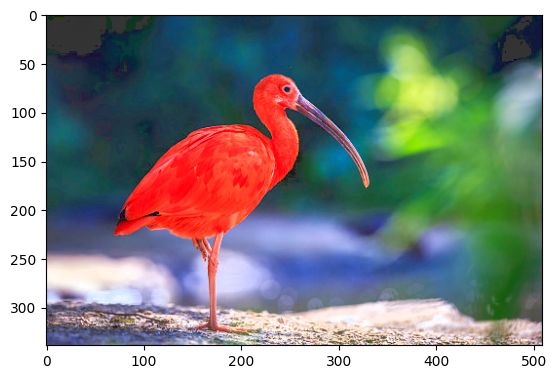

In [3]:
# Task 2

imBGR = cv2.imread('./../img/bird2.jpg') # BGR
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB) # BGR
imHSV = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV) # Conversion to HSV

h, s, v = cv2.split(imHSV)

while(True):
    brightness_increase = input('Enter brightness value to increase (0-255)')
    brightness_increase = int(brightness_increase)
    if (brightness_increase <= 255 and brightness_increase >= 0):
        break

v = v.astype(np.uint16)
v = np.clip(v + brightness_increase, 0, 255)
v = v.astype(np.uint8)
            
imBrightenedHSV = cv2.merge((h, s, v))
imBrightenedRGB = cv2.cvtColor(imBrightenedHSV, cv2.COLOR_HSV2RGB)

plt.imshow(imRGB)
plt.show()

plt.imshow(imBrightenedRGB)
plt.show()

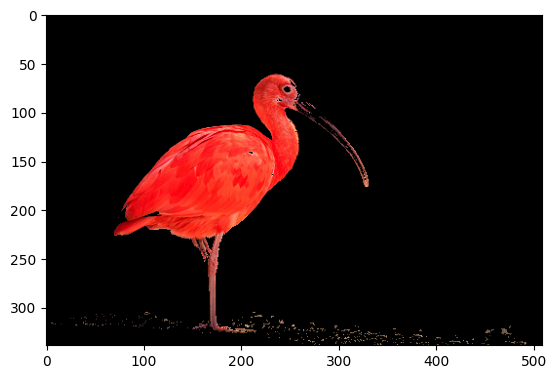

: 

In [4]:
# Task 3

imBGR = cv2.imread('./../img/bird2.jpg') # BGR
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB) # BGR
imHSV = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV) # Conversion to HSV

imMaskRedLower = cv2.inRange(imHSV, (0,80,80), (20,255,255)) # Capture lower part of red (0-10 degrees)
imMaskRedUpper = cv2.inRange(imHSV, (160,80,80), (180,255,255)) # Capture higher part of red (160-180 degrees)

imMaskFinal = cv2.bitwise_or(imMaskRedLower, imMaskRedUpper) # Combine both masks using bitwise or
imMaskedRGB = cv2.bitwise_and(imRGB, imRGB, mask=imMaskFinal) # Apply final mask

plt.imshow(imMaskedRGB)
plt.show()

Image.fromarray(imMaskedRGB.astype(np.uint8)).save('maskedbird.jpeg')